### This Project is About Some Data which is taken from Kaggle :
 We Can See that 30% People miss their appointment and We will try to find why is that and also try to predict whether a person is more likely to no-show or show.
 
 ##### The Link for dataset is given below :
 https://www.kaggle.com/joniarroba/noshowappointments
 
 #### We will be try to do below stuffs :-
 1. Data Analysis
 2. Feature Engineering 
 3. Feature Selection
 4. Model Selection
 5. Model Deployment

In [1]:
## Import the dependeries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)
import seaborn as sns

In [2]:
## Import the dataset
data = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
## Let's view some data from head
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
data.shape

(110527, 14)

In [5]:
## Let's see info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [7]:
data['Output_value'] = (data['No-show']=='Yes').astype(int)

In [8]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Output_value
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [9]:
## Let's check is there any null values
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
Output_value      0
dtype: int64

As we can see we don't have null values

In [10]:
## We can check the prevalance of output_value
def cal_prevalnce(y):
    return (sum(y)/len(y))
cal_prevalnce(data['Output_value'])

0.20193255946510807

This mean that in every 5 person 1 person misses their appointment 
#### Now Let's deal with date and time format 

In [11]:
## Let's deal with date and time columns by looking at their columns
data['ScheduledDay'].head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

In [12]:
data['AppointmentDay'].head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

## Feature Engineering

In [13]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], 
 format = '%Y-%m-%dT%H:%M:%S', 
 errors = 'coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], 
 format = '%Y-%m-%dT%H:%M:%S', 
 errors = 'coerce')

In [14]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Output_value
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [15]:
data['ScheduledDay'].head()

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [16]:
data['AppointmentDay'].head()

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [17]:
## Let's see how many dates are scheduled after the appointment datetime
(data['AppointmentDay']<data['ScheduledDay']).sum()

38568

We have apporx 40k datas which are scheduled after the appointment. Hence it may be happen because we don't have time stamp for Appointment column. So let's do one thing let's shift the time of Appointment column at the last time of day that is 23:59:59.

In [18]:
data['AppointmentDay'] = data['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')

In [19]:
data['AppointmentDay'].head()

0   2016-04-29 23:59:59+00:00
1   2016-04-29 23:59:59+00:00
2   2016-04-29 23:59:59+00:00
3   2016-04-29 23:59:59+00:00
4   2016-04-29 23:59:59+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [20]:
## Now Again check how many dates are appointed before scheduled
(data['AppointmentDay']<data['ScheduledDay']).sum()

5

Hence, After that we have only 5 data, we can easily drop those data 

In [21]:
data.loc[(data['AppointmentDay']<=data['ScheduledDay'])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Output_value
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 23:59:59+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 23:59:59+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 23:59:59+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 23:59:59+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,1
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 23:59:59+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,1


In [22]:
data.drop(data.loc[(data['AppointmentDay']<=data['ScheduledDay'])].index,axis=0,inplace=True)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Output_value
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [23]:
(data['AppointmentDay']<=data['ScheduledDay']).sum()

0

#### Now We have dealt with date time data and we will move forward and Differencitate year,month etc.

In [24]:
## We are differencitate year , month, day 
data['ScheduledDay_year'] = data['ScheduledDay'].dt.year
data['ScheduledDay_month'] = data['ScheduledDay'].dt.month
data['ScheduledDay_week'] = data['ScheduledDay'].dt.isocalendar().week
data['ScheduledDay_day'] = data['ScheduledDay'].dt.day
data['ScheduledDay_hour'] = data['ScheduledDay'].dt.hour
data['ScheduledDay_minute'] = data['ScheduledDay'].dt.minute
data['ScheduledDay_dayofweek'] = data['ScheduledDay'].dt.dayofweek


data['AppointmentDay_year'] = data['AppointmentDay'].dt.year
data['AppointmentDay_month'] = data['AppointmentDay'].dt.month
data['AppointmentDay_week'] = data['AppointmentDay'].dt.isocalendar().week
data['AppointmentDay_day'] = data['AppointmentDay'].dt.day
data['AppointmentDay_hour'] = data['AppointmentDay'].dt.hour
data['AppointmentDay_minute'] = data['AppointmentDay'].dt.minute
data['AppointmentDay_dayofweek'] = data['AppointmentDay'].dt.dayofweek

In [25]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Output_value,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,2016,4,17,29,18,38,4,2016,4,17,29,23,59,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,2016,4,17,29,16,8,4,2016,4,17,29,23,59,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,2016,4,17,29,16,19,4,2016,4,17,29,23,59,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,2016,4,17,29,17,29,4,2016,4,17,29,23,59,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,2016,4,17,29,16,7,4,2016,4,17,29,23,59,4


#### Now we will dig our data a little bit About ScheduledDay and AppointmentDay

In [26]:
data.groupby('AppointmentDay_year').size()

AppointmentDay_year
2016    110522
dtype: int64

In [27]:
data.groupby('AppointmentDay_month').size()

AppointmentDay_month
4     3235
5    80836
6    26451
dtype: int64

In [28]:
data.groupby('AppointmentDay_dayofweek').size()

AppointmentDay_dayofweek
0    22714
1    25638
2    25866
3    17246
4    19019
5       39
dtype: int64

As you can see here, the appointments are in April, May and June of 2016 and range from Monday through Saturday with no appointments on Sunday.

In [29]:
data.groupby('AppointmentDay_dayofweek').apply(lambda x: cal_prevalnce(x.Output_value.values))

AppointmentDay_dayofweek
0    0.206437
1    0.200874
2    0.196861
3    0.193494
4    0.212261
5    0.230769
dtype: float64

Looks like more people skip their appointment on friday and saturday.

In [30]:
## Let's calculate difference between Appointment and Schelduled Days
data['Delta_days'] = (data['AppointmentDay']-data['ScheduledDay']).dt.total_seconds() / 60*60*24

In [31]:
data['Delta_days'].value_counts()

1454520.0      25
1454544.0      25
29609592.0     22
73154208.0     22
15094944.0     19
               ..
119605800.0     1
102238752.0     1
1058328.0       1
52967856.0      1
85923432.0      1
Name: Delta_days, Length: 89707, dtype: int64

<AxesSubplot:xlabel='Delta_days', ylabel='Count'>

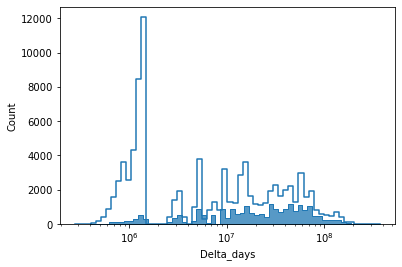

In [32]:
## Let's try to plot histogram 
sns.histplot(data.loc[data.Output_value==1,'Delta_days'],bins=60,label='Missed',log_scale=True,element='step')
sns.histplot(data.loc[data.Output_value==0,'Delta_days'],bins=60,label='Not-Missed',log_scale=True,element='step',fill=False)

## Feature Selection

In [33]:
 ## Now Let's view our data once more
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Output_value,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek,Delta_days
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.0,110522.000000,110522.000000,110522.000000,110522.0,110522.0,110522.000000,1.105220e+05
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,0.201896,2015.999439,4.823863,18.744657,14.252438,10.774497,28.997068,1.851948,2016.0,5.210058,20.168917,12.499620,23.0,59.0,1.858264,2.221826e+07
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,0.401417,0.023678,0.715816,2.802840,9.345727,3.216200,17.253608,1.378544,0.0,0.473789,1.775248,9.056561,0.0,0.0,1.371683,3.161035e+07
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000,2016.0,4.000000,17.000000,1.000000,23.0,59.0,0.000000,2.809200e+05
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,17.000000,6.000000,8.000000,14.000000,1.000000,2016.0,5.000000,19.000000,5.000000,23.0,59.0,1.000000,1.355838e+06
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,19.000000,13.000000,10.000000,29.000000,2.000000,2016.0,5.000000,20.000000,10.000000,23.0,59.0,2.000000,9.278868e+06
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,5.000000,20.000000,22.000000,13.000000,44.000000,3.000000,2016.0,5.000000,22.000000,19.000000,23.0,59.0,3.000000,3.176885e+07
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2016.000000,12.000000,51.000000,31.000000,21.000000,59.000000,5.000000,2016.0,6.000000,23.000000,31.000000,23.0,59.0,5.000000,3.723250e+08


In [34]:
## Now Let's drop unneccesary columns
data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood','No-show',],axis=1,inplace=True)

In [35]:
data.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Output_value,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek,Delta_days
0,F,62,0,1,0,0,0,0,0,2016,4,17,29,18,38,4,2016,4,17,29,23,59,4,463464.0
1,M,56,0,0,0,0,0,0,0,2016,4,17,29,16,8,4,2016,4,17,29,23,59,4,679008.0
2,F,62,0,0,0,0,0,0,0,2016,4,17,29,16,19,4,2016,4,17,29,23,59,4,663720.0
3,F,8,0,0,0,0,0,0,0,2016,4,17,29,17,29,4,2016,4,17,29,23,59,4,562272.0
4,F,56,0,1,1,0,0,0,0,2016,4,17,29,16,7,4,2016,4,17,29,23,59,4,680544.0


In [36]:
## Let's convert Gender Male into 1 and female into 0
data['Gender'].replace(['M','F'],[1,0],inplace=True)

In [37]:
data.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Output_value,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek,Delta_days
0,0,62,0,1,0,0,0,0,0,2016,4,17,29,18,38,4,2016,4,17,29,23,59,4,463464.0
1,1,56,0,0,0,0,0,0,0,2016,4,17,29,16,8,4,2016,4,17,29,23,59,4,679008.0
2,0,62,0,0,0,0,0,0,0,2016,4,17,29,16,19,4,2016,4,17,29,23,59,4,663720.0
3,0,8,0,0,0,0,0,0,0,2016,4,17,29,17,29,4,2016,4,17,29,23,59,4,562272.0
4,0,56,0,1,1,0,0,0,0,2016,4,17,29,16,7,4,2016,4,17,29,23,59,4,680544.0


In [38]:
data.duplicated().sum()

722

In [39]:
## Let's drop the duplicates
data.drop_duplicates(inplace=True)

In [40]:
data.to_csv('Dataset.csv',index_label=False)

In [41]:
## Let's see some cleaned data
data.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Output_value,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek,Delta_days
0,0,62,0,1,0,0,0,0,0,2016,4,17,29,18,38,4,2016,4,17,29,23,59,4,463464.0
1,1,56,0,0,0,0,0,0,0,2016,4,17,29,16,8,4,2016,4,17,29,23,59,4,679008.0
2,0,62,0,0,0,0,0,0,0,2016,4,17,29,16,19,4,2016,4,17,29,23,59,4,663720.0
3,0,8,0,0,0,0,0,0,0,2016,4,17,29,17,29,4,2016,4,17,29,23,59,4,562272.0
4,0,56,0,1,1,0,0,0,0,2016,4,17,29,16,7,4,2016,4,17,29,23,59,4,680544.0
